In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')

In [2]:
gssData = pd.read_stata('GSS2014merged_R6.dta', convert_categoricals=False)
gssData.head()

,year,id,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,occ10,prestg10,...,clsgayw,othgayw,clsnjobm,othnjobm,clsnjobw,othnjobw,clspolm,othpolm,clspolw,othpolw
0,2014,1,1.0,60.0,NaN,NaN,1.0,2.0,220.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,2,1.0,40.0,NaN,NaN,2.0,2.0,700.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,3,4.0,NaN,NaN,NaN,2.0,2.0,8740.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,4,2.0,20.0,NaN,NaN,2.0,2.0,50.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,5,5.0,NaN,NaN,1.0,2.0,1.0,800.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
gssData.set_index('id')
gssData.drop('id', 1, inplace=True)
gssData.head()

,year,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,occ10,prestg10,prestg105plus,...,clsgayw,othgayw,clsnjobm,othnjobm,clsnjobw,othnjobw,clspolm,othpolm,clspolw,othpolw
0,2014,1.0,60.0,NaN,NaN,1.0,2.0,220.0,53.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,1.0,40.0,NaN,NaN,2.0,2.0,700.0,51.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,4.0,NaN,NaN,NaN,2.0,2.0,8740.0,39.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,2.0,20.0,NaN,NaN,2.0,2.0,50.0,53.0,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,5.0,NaN,NaN,1.0,2.0,1.0,800.0,60.0,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
gssData.to_csv('GSS2014merged.csv')

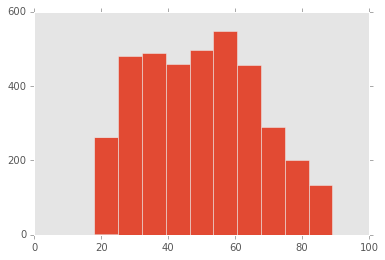

In [5]:
gssData['age'].hist()
plt.grid()
plt.locator_params(nbins=5)

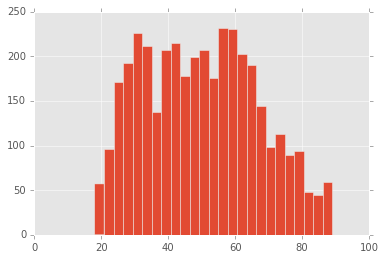

In [6]:
gssData['age'].hist(bins=25)
plt.locator_params(nbins=5)

In [7]:
inc_age = gssData[['realrinc', 'age']]
inc_age.head()

,realrinc,age
0,39022.50,53.0
1,39022.50,26.0
2,NaN,59.0
3,6503.75,56.0
4,NaN,74.0


In [8]:
inc_age = gssData[['realrinc', 'age']].dropna()
inc_age.head(10)

,realrinc,age
0,39022.50000,53.0
1,39022.50000,26.0
3,6503.75000,56.0
5,132148.07386,56.0
7,15372.50000,34.0
9,21285.00000,30.0
13,11233.75000,40.0
14,13007.50000,25.0
15,11233.75000,56.0
16,39022.50000,51.0


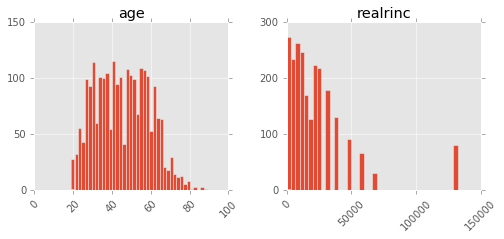

In [9]:
axs = inc_age.hist(bins=40, figsize=(8, 3), xrot=45)
for ax in axs[0]:
    ax.locator_params(axis='x', nbins=6)
    ax.locator_params(axis='y', nbins=3)

In [10]:
inc_age[inc_age['realrinc'] > 1e5].count()

realrinc    80
age         80
dtype: int64

In [11]:
inc_age[inc_age['realrinc'] > 1e5].head(10)

,realrinc,age
5,132148.07386,56.0
17,132148.07386,46.0
66,132148.07386,65.0
67,132148.07386,57.0
77,132148.07386,58.0
127,132148.07386,38.0
136,132148.07386,61.0
217,132148.07386,46.0
231,132148.07386,69.0
241,132148.07386,51.0


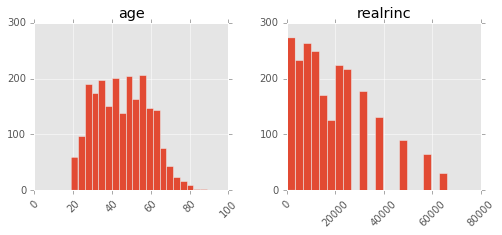

In [12]:
inc_age = gssData[['realrinc', 'age']]
lowinc_age = inc_age[inc_age['realrinc'] < 1e5]
axs = lowinc_age.hist(bins=20, figsize=(8, 3), xrot=45)
for ax in axs[0]:
    ax.locator_params(axis='x', nbins=6)
    ax.locator_params(axis='y', nbins=3)

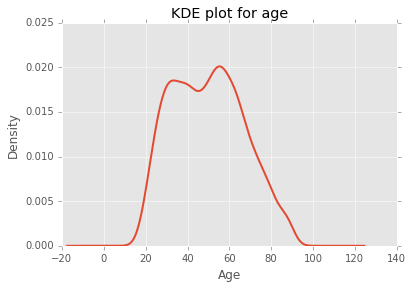

In [13]:
age = gssData['age'].dropna()
age.plot(kind='kde', lw=2)
plt.title('KDE plot for age')
plt.xlabel('Age')

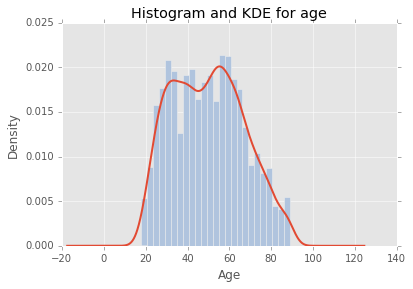

In [14]:
ax = age.hist(bins=25, color='LightSteelBlue', normed=True)
age.plot(kind='kde', lw=2, ax=ax)
plt.title('Histogram and KDE for age')
plt.xlabel('Age')

((array([-3.56557347, -3.32592156, -3.1936113 , ...,  3.1936113 ,
          3.32592156,  3.56557347]),
  array([ 18.,  18.,  18., ...,  89.,  89.,  89.])),
 (16.86927926580902, 49.837611314824514, 0.98880936001379327))

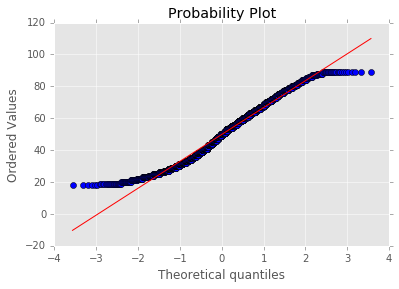

In [15]:
import scipy.stats as stats
stats.probplot(age, dist='norm', plot=plt)

In [16]:
inc = gssData['realrinc'].dropna()
inc = inc[inc < 1e5]
inc.describe()

count     2252.000000
mean     19178.396203
std      14774.789813
min        236.500000
25%       7686.250000
50%      15372.500000
75%      26015.000000
max      66220.000000
Name: realrinc, dtype: float64

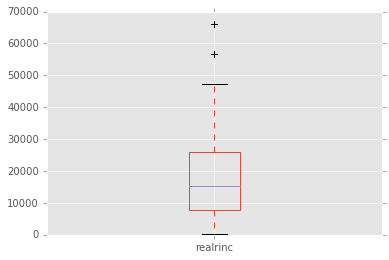

In [17]:
inc.plot(kind='box')

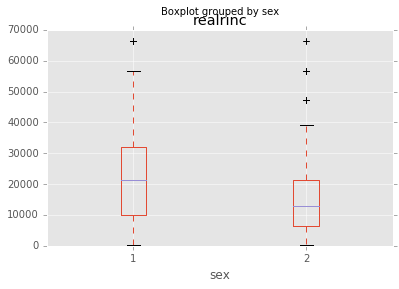

In [18]:
inc_gen = gssData[['realrinc', 'sex']]
inc_gen = inc_gen[inc_gen['realrinc'] < 1e5]
inc_gen.boxplot(column='realrinc', by='sex')